<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/1_3_2Generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081))])

train_dataset = torchvision.datasets.MNIST('mnist_data/', train=True, download=True, transform=transform)

# train_labels = train_dataset.targets.numpy()

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.MNIST('mnist_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)



In [ ]:
# Define the DNN model
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt

class DNN(nn.Module):
    def __init__(self,hidden):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden)
        self.fc2 = nn.Linear(hidden, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, loss function, and optimizer


In [ ]:
# i = 1
Main_Train_acc = []
Main_Test_acc = []
Main_Train_loss = []
Main_Test_loss = []
for i in range(10):
  model = DNN(8*(i+1))
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
  train_losses = []
  train_accuracies = []
  test_losses = []
  test_accuracy = []
  for epoch in range(30):
      total = 0
      correct = 0
      total_loss = 0
      for batch_idx, (images, labels) in enumerate(trainloader):
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          total_loss += loss.item() 
      train_losses.append(total_loss/total)
      train_accuracies.append(100* correct/total)

     

      correct = 0
      total = 0
      with torch.no_grad():
        losses= []
        total_loss = 0
        for data in testloader:
          images, labels = data
          outputs = model(images)
          loss = criterion(outputs, labels)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          total_loss += loss.item()
        test_accuracy.append(100 *correct/total)
        test_losses.append(total_loss/total)
  print("Model {} Training Done".format(i))
  Main_Train_acc.append(train_accuracies[-1])
  Main_Test_acc.append(test_accuracy[-1])
  Main_Train_loss.append(train_losses[-1])
  Main_Test_loss.append(test_losses[-1])


Model 0 Training Done
Model 1 Training Done
Model 2 Training Done
Model 3 Training Done
Model 4 Training Done
Model 5 Training Done
Model 6 Training Done
Model 7 Training Done
Model 8 Training Done
Model 9 Training Done


In [ ]:
paramArray = []
for i in range(10):
    model = DNN(8*(i+1))
    params = sum(p.numel() for p in model.parameters())
    paramArray.append(params)
    print("Number of parameters:", params)
    

Number of parameters: 6898
Number of parameters: 13434
Number of parameters: 19970
Number of parameters: 26506
Number of parameters: 33042
Number of parameters: 39578
Number of parameters: 46114
Number of parameters: 52650
Number of parameters: 59186
Number of parameters: 65722


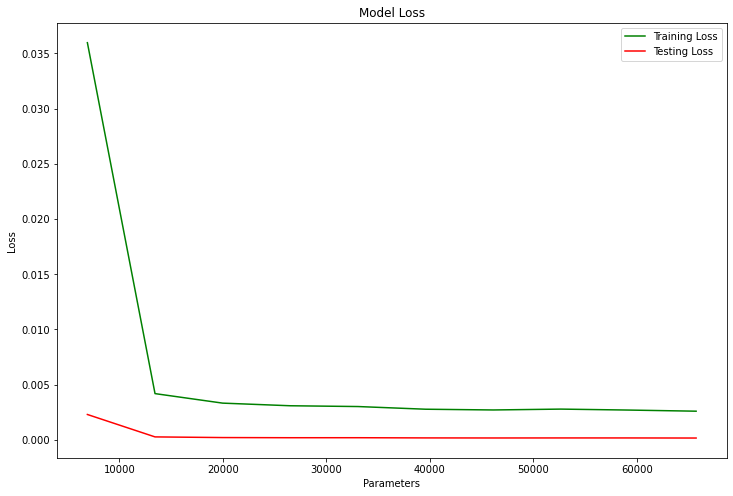

In [ ]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss')
ax.plot(paramArray,Main_Train_loss, 'g', label='Training Loss')
ax.plot(paramArray,Main_Test_loss, 'r', label='Testing Loss')
ax.legend()

ax.set_xlabel('Parameters')
ax.set_ylabel('Loss')
plt.show()

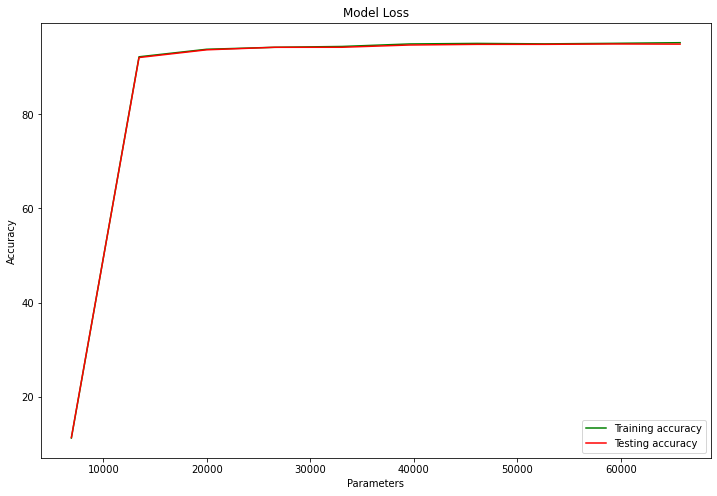

In [ ]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss')
ax.plot(paramArray,Main_Train_acc, 'g', label='Training accuracy')
ax.plot(paramArray,Main_Test_acc, 'r', label='Testing accuracy')
ax.legend()
ax
ax.set_xlabel('Parameters')
ax.set_ylabel('Accuracy')
plt.show()

In [ ]:
Main_Train_acc

[11.236666666666666,
 92.225,
 93.825,
 94.245,
 94.42,
 94.95333333333333,
 95.07166666666667,
 94.97333333333333,
 95.08333333333333,
 95.22333333333333]